## Customer satisfaction measurement

#### References

McGuire,P., 2019. *Will artificial intelligence kill the contact centre?*, 7 March 2019. [Online]. Available from: https://www.irishtimes.com/business/innovation/will-artificial-intelligence-kill-the-contact-centre-1.3811094

Chicu,D, Ryan, G. and Valverde-Aparicio, M., 2016. 'Determinants  of  customer  satisfaction  in  call centres'. *European Accounting and Management Review Issue 2 (2016)* [Online]. Available from https://www.researchgate.net/publication/304792295_Determinants_of_customer_satisfaction_in_call_centres 

*How is Average Handling Time (AHT) Distributed? It is Not How you Think!*, 8 February 2017 [Online]. Available from: https://www.callcentrehelper.com/how-is-average-handling-time-distributed-it-is-not-how-you-think-97688.htm

*Logarithmic distribution*, 22 September 2019 [Online]. Available from: https://en.wikipedia.org/wiki/Logarithmic_distribution

SciPy Docs, 24 July 2018 [Online]. Available from: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html

Longelin, J., *The 10 Best Metrics To Measure Call Center Agent Productivity* 29 August 2018. [Online]. Available from: https://blog.playvox.com/metrics-to-measure-call-center-agent-productivity

## Introduction

On estimate 60,000 people work in contact centres and shared service in Ireland, with the average salary at just under €30,000 (McGuire 2019). Companies, big and small, are constantly looking for the way to improve customer service satisfatcion hence monitoring performance of the customer service centre agents is on top of the agenda for customer service management teams. 

Customer satisfaction  may  be affected by factors such as price, product performance, and service (Bitner et al., 1990; Brown and Maxwell, 2002; Day, 1984; Parasuraman et al., 1988). Most  studies  addressing  the  relationship  between  service  quality  and  customer satisfaction suggest a positive link between the two (Sharma et al., 2009; Upal and Dhaka, 2008).  
Furthermore some reseachers suggest customer satisfaction depends also on employee ability to ensure first call resolution (Abdullateef et al., 2011; Aksin et al., 2007; Feinberg et al., 2000) or service level (Cheong et al., 2008).

This project will inestigate the satisfaction of customers based on the service they received from the agent. 
This SurveyM online poll was conducted between Oct 1-31, 2019 among customers who called the agents and received the service. The total of 100 surveys were receved in that period. Each customer had to rate in the scale from 1 to 5 timely resolution, agent's knowledge, agent's attitude. The final question about overal customer satisfaction can be rated from 1 to 3 (1 - below expectation, 2 - satisfied, 3 - exceeded expectation).


The call centre is based in Ireland and the it serves customers from around the globe. Agents to do not sell any productes but rather assist callers with website functionality and technical troubleshooting. The customer satisfaction is the main objective in their role.  


## Data import

### Libraries

In [2]:
import sklearn.neighbors as nei
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.model_selection as mod
import matplotlib.pyplot as plt

### Load Data 

In [3]:
# Load data set
df = pd.read_excel (r'C:\Users\user\Documents\Kasia - Data Analytics course\Projects\DAProg2019\ProgDA_Project2019\Survey results.xlsx')

In [4]:
df.head(n=2)

,Satisfaction from timely query resolution,Agent attitude,Agent knowledge,Overall Satisfaction
0,5,5,5,Exceeded expectations
1,5,5,5,Exceeded expectations


In [5]:
df.tail(n=2)

,Satisfaction from timely query resolution,Agent attitude,Agent knowledge,Overall Satisfaction
99,5,5,5,Exceeded expectations
100,5,5,5,Exceeded expectations


In [10]:
df.describe()

,Satisfaction from timely query resolution,Agent attitude,Agent knowledge
count,101.000000,101.000000,101.000000
mean,4.504950,4.584158,4.514851
std,1.092005,1.022422,1.073442
min,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000
50%,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


## Variables

### Satisfaction from timely query resolution

While many other metrics can reveal areas where agents are falling short, the customer satisfaction score is the most direct measure to tell if call center is providing the support the customers need (Longelin, 2018).

In the survey the customer satisfaction is determined by the answer to the below question: 

*On the scale from 1 to 5 how satisfied or dissatisfied are you with how the Agent resolved your query in a timely manner? 
(1-Very dissatisfied, 2-Somewhat dissatisfied, 3- Neither satisfied nor dissatisfied, 4 - Somewhat satisfied, 5 - Very satisfied)
 
This categorical variable has the average score of 4.50 out of 5. The left-skewed distribution can be observed here (also called negative-skew).

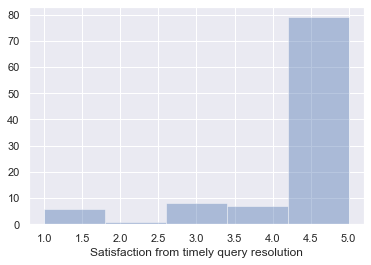

In [31]:
sns.distplot(df['Satisfaction from timely query resolution'], kde=False, bins=5)

### Agent attitude

Employees are the brand ambassadors and their behaviour towards the customers have significant impact on how the company is perceived. The agent's attitude (customer  orientation,  responsiveness) is important indicator of not only how happy the customers are but they are also widely used by the company managers for HR analysis.

The data that measure the agent' behaviour is gather as the answer to the following question:
*The Agent was courteous and professional. 
 Strongly Disagree 
 Disagree 
 Neutral 
 Agree 
 Strongly Agree 

The eft-skewed distributions
The left-skewed distribution can be observed here (also called negative-skew).
Here is a histogram and a quantile-quantile plot for a left-skewed distribution.

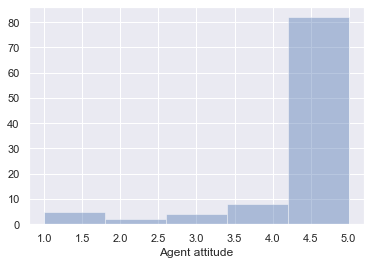

In [15]:
sns.distplot(df['Agent attitude'], kde=False, bins=5)

### Agent knowledge

Quite often the comments that are left on the survey suggest that company should ensure knowledgable staff do not leave. Fast resolution of customer query is often the result of the agent's knowledge so the third variable is rating of agent in terms of how represents how knowledgable and easy to understand agent is.
1 - strongly unsatisfied, 2 - smoewhat unsatisfied, 3- neither satisfied nor unsatisfied, 4- somewhat satisfied, 5 - strongly satisfied.

The left-skewed distribution can be observed here (also called negative-skew).


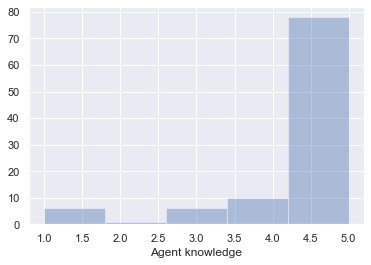

In [20]:
sns.distplot(df['Agent knowledge'], kde=False, bins=5)

### Overall Satisfaction

This call centre aims to offer a very high service and employees are assessed indirectly via the survey. The quality of the service is rated based on the answers to the below question:

*How would you rate the overall quality of the service you received from the Agent 
 - Below your expectations (select 1)
 - Satisfied your expectations (select 2)
 - Exceeded your expectations (select 3)
 
 This categorical data will be generated using normal distribution


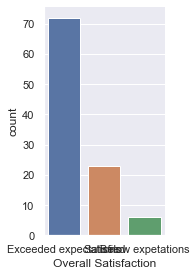

In [30]:
g = sns.catplot(x="Overall Satisfaction",
                    data=df, kind="count",
                    height=4, aspect=.7)

### Data Visualization

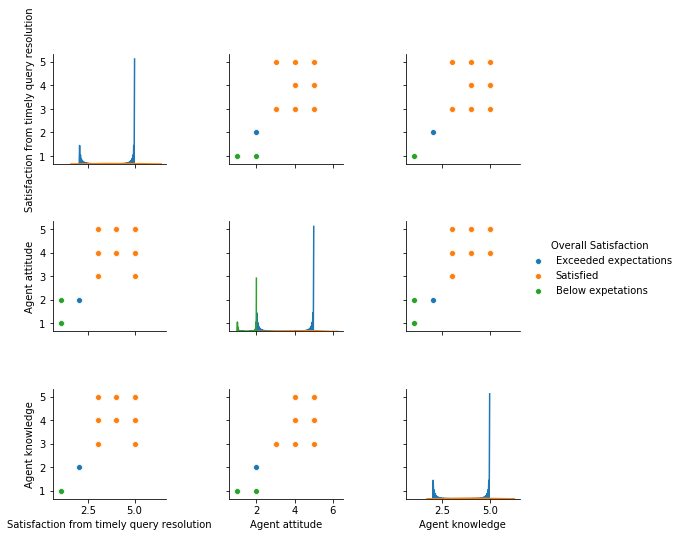

In [60]:
# Load the seaborn package
sns.pairplot(df, hue='Overall Satisfaction')

In [36]:
inputs = df[['Satisfaction from timely query resolution', 'Agent attitude', 'Agent knowledge']]
outputs = df['Overall Satisfaction']

In [37]:
knn = nei.KNeighborsClassifier(n_neighbors=2)

In [38]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### Predict

In [39]:
df.loc[75]

Satisfaction from timely query resolution                        5
Agent attitude                                                   5
Agent knowledge                                                  5
Overall Satisfaction                         Exceeded expectations
Name: 75, dtype: object

In [40]:
knn.predict([[3, 3, 4]])

array(['Satisfied'], dtype=object)

### Evaluate

In [54]:
(knn.predict(inputs) == outputs).sum()

97

In [55]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [56]:
# Recreate the classifier
knn = nei.KNeighborsClassifier(n_neighbors=2)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [57]:
(knn.predict(inputs_test) == outputs_test).sum()

33

### End